In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Model
from keras.layers import *
from keras.metrics import RootMeanSquaredError
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
housing = fetch_california_housing()

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
X_test.shape

(5160, 8)

In [ ]:
X_valid.shape

(3870, 8)

In [ ]:
y_train.shape

(11610,)

In [ ]:
y_test.shape

(5160,)

In [ ]:
y_valid.shape

(3870,)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
input = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation="relu")(input)
hidden2 = Dense(30, activation="relu")(hidden1)
c = concatenate([input,hidden2])
output = Dense(1)(c)
model = Model(input,output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_6 (Dense)                (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 30)           930         ['dense_6[0][0]']                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 38)           0           ['input_3[0][0]',                
                                                                  'dense_7[0][0]']          

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3427 - val_loss: 0.3238
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3401 - val_loss: 0.3214
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3251 - val_loss: 0.3155
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3396 - val_loss: 0.3163
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3337 - val_loss: 0.3314
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3287 - val_loss: 0.3094
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3278 - val_loss: 0.3076
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3264 - val_loss: 0.3188
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3184 - val_loss: 0.3200
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3126 - val_loss: 0.3076

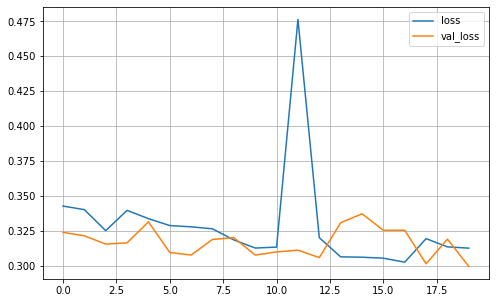

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.2921


0.29213377833366394

In [ ]:
X_new = X_test[:3]
X_pred = model.predict(X_new)
X_pred

1/1 [==============================] - 0s 62ms/step


array([[1.191538 ],
       [1.8637452],
       [1.7905571]], dtype=float32)

In [ ]:
y_test[:3]

array([0.75 , 2.938, 1.804])